In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun


import datetime
import seaborn as sns
sns.set()

In [3]:
%load_ext autoreload
%autoreload

In [4]:
# plotting dfs:
('roi_df_plotting.csv')
('top_percent_roi_plotting.csv')
('chi_plot.csv')

# modeling dfs:
('top_roi_for_melting.csv')
('chi_roi_for_melting.csv')
('top_zips_with_all_columns.csv')

'top_zips_with_all_columns.csv'

In [24]:
df = pd.read_csv('chi_plot.csv')
df.head()

,time,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
0,2011-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,...,172100.0,142700.0,228100.0,134600.0,133300.0,555800.0,289000.0,120100.0,276800.0,944900.0
1,2011-02,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,...,171400.0,141600.0,227200.0,133400.0,132500.0,557400.0,288700.0,122000.0,272900.0,948800.0
2,2011-03,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,...,170100.0,141200.0,225900.0,132300.0,131600.0,557600.0,287300.0,123200.0,269300.0,953700.0
3,2011-04,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,...,168400.0,141300.0,224200.0,131200.0,130300.0,556500.0,284800.0,123300.0,266700.0,957500.0
4,2011-05,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,...,166700.0,141500.0,223100.0,130300.0,129000.0,559100.0,281400.0,123100.0,262500.0,961000.0


In [25]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m')
df.head()

,time,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
0,2011-01-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,...,172100.0,142700.0,228100.0,134600.0,133300.0,555800.0,289000.0,120100.0,276800.0,944900.0
1,2011-02-01,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,...,171400.0,141600.0,227200.0,133400.0,132500.0,557400.0,288700.0,122000.0,272900.0,948800.0
2,2011-03-01,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,...,170100.0,141200.0,225900.0,132300.0,131600.0,557600.0,287300.0,123200.0,269300.0,953700.0
3,2011-04-01,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,...,168400.0,141300.0,224200.0,131200.0,130300.0,556500.0,284800.0,123300.0,266700.0,957500.0
4,2011-05-01,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,...,166700.0,141500.0,223100.0,130300.0,129000.0,559100.0,281400.0,123100.0,262500.0,961000.0


In [26]:
df.set_index('time', inplace = True)
df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
time,,,,,,,,,,,,,,,,,,,,,
2011-01-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,749200.0,...,172100.0,142700.0,228100.0,134600.0,133300.0,555800.0,289000.0,120100.0,276800.0,944900.0
2011-02-01,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,748600.0,...,171400.0,141600.0,227200.0,133400.0,132500.0,557400.0,288700.0,122000.0,272900.0,948800.0
2011-03-01,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,747300.0,...,170100.0,141200.0,225900.0,132300.0,131600.0,557600.0,287300.0,123200.0,269300.0,953700.0
2011-04-01,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,745300.0,...,168400.0,141300.0,224200.0,131200.0,130300.0,556500.0,284800.0,123300.0,266700.0,957500.0
2011-05-01,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,744200.0,...,166700.0,141500.0,223100.0,130300.0,129000.0,559100.0,281400.0,123100.0,262500.0,961000.0


<AxesSubplot:xlabel='time'>

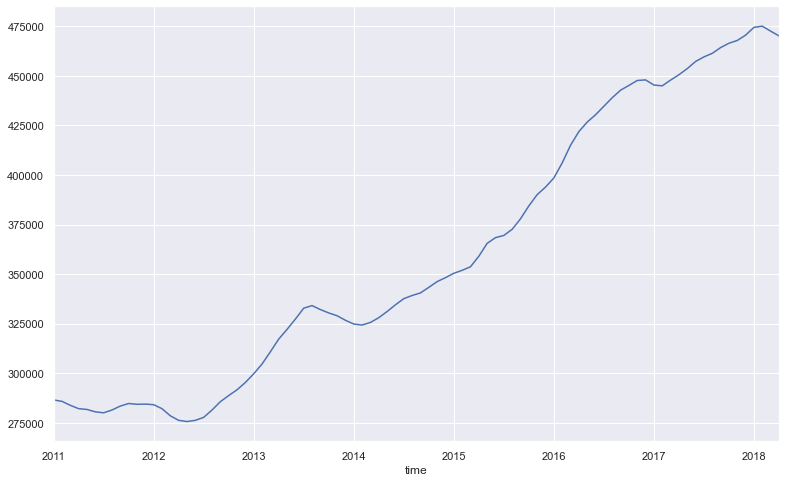

In [27]:
ts = df['60647'].resample('MS').mean()
ts.plot()

In [19]:
# ax = df.plot()
# # ax.legend(bbox_to_anchor=([1,1]))
# ax.set(title=f'Zip Code Home Values - {df.index.freq}')

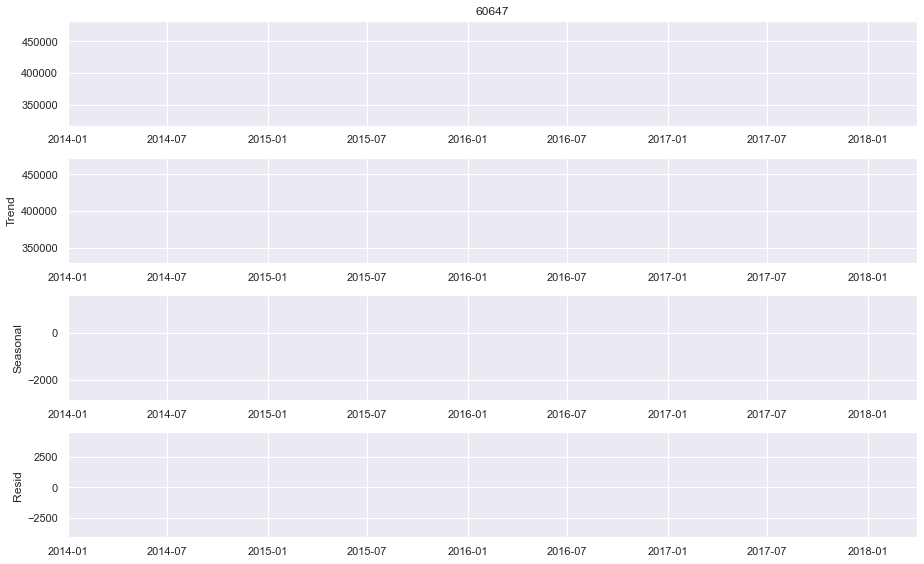

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_mul = seasonal_decompose(ts.loc['2014':],model='add')#,model='mul')
decomp_mul.plot();

In [32]:
from statsmodels.tsa.stattools import adfuller
## Simpler Version of ADfullter func
def adfuller_test_df(ts):
    """Returns the AD Fuller Test Results and p-values for the null hypothesis
    that there the data is non-stationary (that there is a unit root in the data)"""
    df_res = adfuller(ts)
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,df_res[:4]))
    res['p<.05'] = res['p-value']<.05
    res['Stationary?'] = res['p<.05']
    
    return pd.DataFrame(res,index=['AD Fuller Results'])
adfuller_test_df(ts)


,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-0.299251,0.92561,9,78,False,False


In [34]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['stationary?'] = dfoutput['p-value']<.05

    print (dfoutput)
    
    return dfoutput

Results of Dickey-Fuller Test:
Test Statistic                 -0.299251
p-value                         0.925610
#Lags Used                      9.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
stationary?                     0.000000
dtype: float64


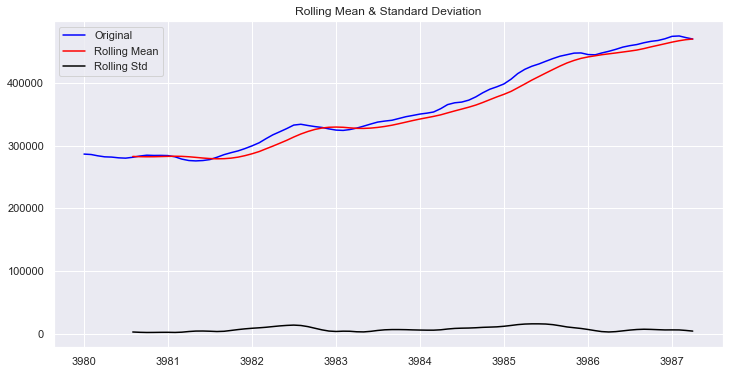

In [35]:
stationarity_check(ts);

,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-0.299251,0.92561,9,78,False,False


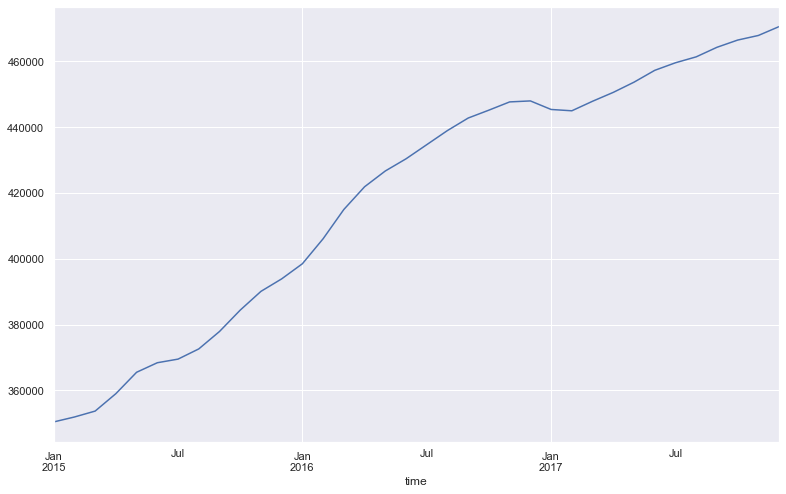

In [36]:
## Combine methods above into one DF
ts.loc['2015':'2017'].plot()

adfuller_test_df(ts)

,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-2.259578,0.185336,8,78,False,False


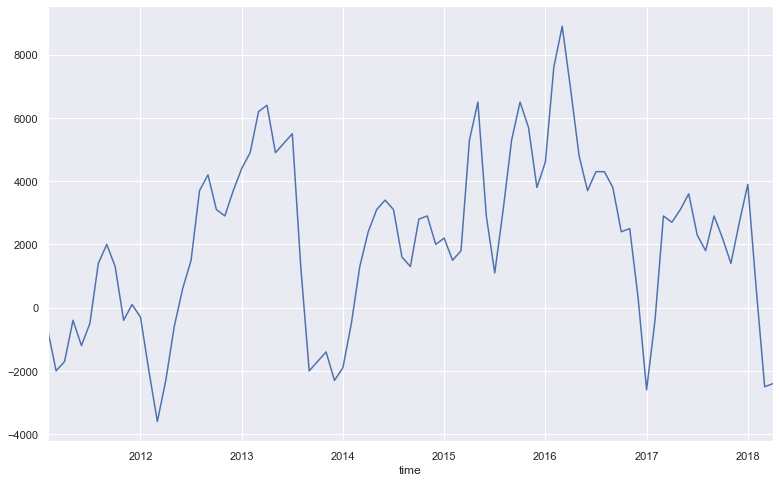

In [37]:
## Differencing 
ts0 = ts.diff().dropna()
ts0.plot()
adfuller_test_df(ts0)

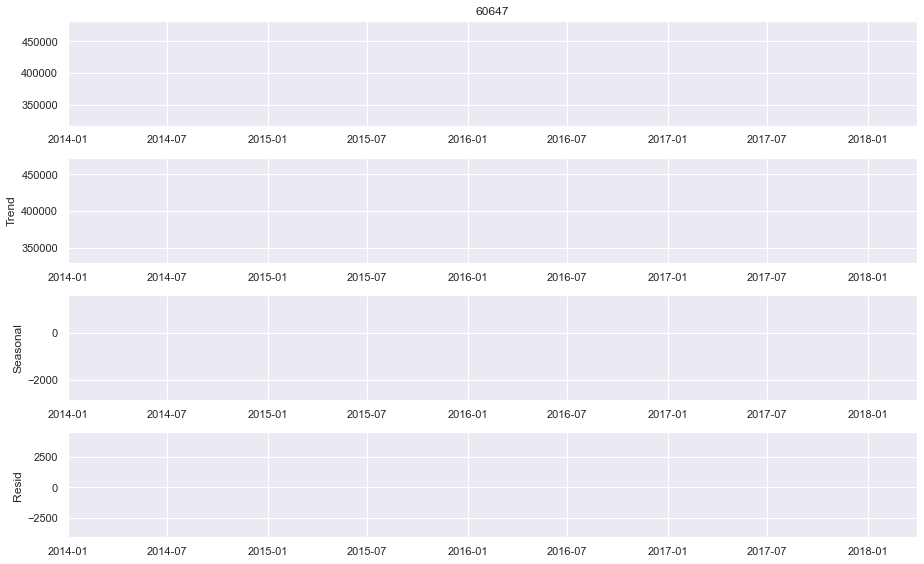

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts.loc['2014':])
decomp.plot();

<AxesSubplot:xlabel='time'>

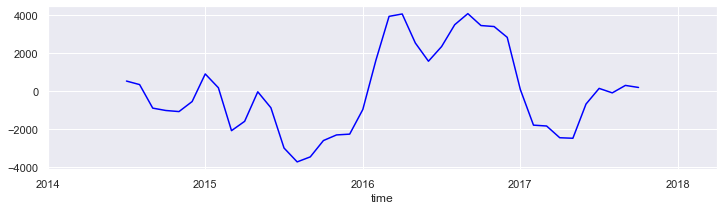

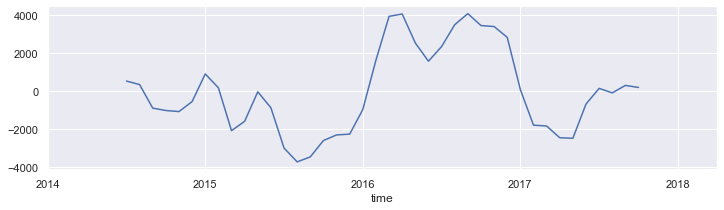

In [40]:
plt.rcParams['figure.figsize'] = [12,3]
decomp_mul.resid.plot(label='mul',color='blue')
plt.figure()
decomp.resid.plot()

,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-334911134188268.750000,0.000000,11,40,True,True


,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-2.765910,0.063311,9,30,False,False


,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-2.578683,0.097484,5,34,False,False


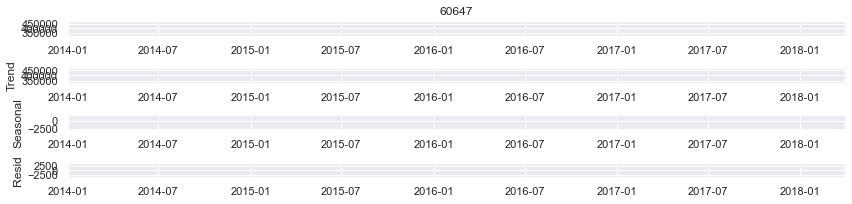

In [41]:
seasons = {'seasonal':decomp.seasonal,
          'trend':decomp.trend,
          'resid':decomp.resid}
for data,ts_ in seasons.items():
    ts_ = ts_.dropna()
#     ts_.plot(title=data)
    plt.show()
    display(adfuller_test_df(ts_).style.set_caption(data))
decomp.plot();

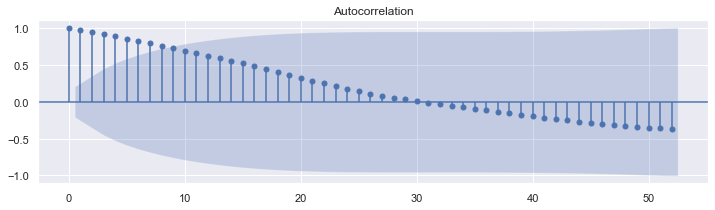

In [42]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(ts,lags=52);